##                                                                       SDPA PART-2 :  DATA ANALYTICS 

LONGER MATURITY BONDS ALWAYS HAVE A YIELD HIGHER THAN SHORTER MATURITY YIELD BONDS. THE RATIONAL BEING AN INVESTOR IS TAKING MORE RISK HOLDING A LONG TERM BOND AS COMPARED TO A SHORT TERM BOND AND HENCE DEMANDS MORE RETURNS. 

WHEN INVESTORS BELIEVE THAT IN THE SHORT TERM (NEXT 1-2 YEARS) THERE CAN BE SLOWDOWN IN THE ECONOMY, THEY DEMAND HIGHER RETURNS. WHEN LONG-TERM BONDS 
YIELD LESS SHORT-TERM BOND BECOMES NEGATIVE, IT IS SAID THAT THE YEILD CURVE HAS INVERTED. 

AIM OF THIS ANALYSIS IS TO FIND THE IF THE BOND CURVE INVERSION CAN PREDICT INCOMING RECESSION IN THE STOCK MARKETS. FOR THIS ANALYSIS WE WILL USE 13 MONTH US TREASURY NOTES AND 10 YEAR US TREASURY BILLS.


In [1]:
pip install yfinance
pip install pandas_datareader
pip install nasdaq-data-link

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 67.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import nasdaqdatalink
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
%matplotlib inline


In [46]:
# DEFINING THE RANGE FOR THE ANALYSIS

start_date = '2000-01-01'
end_date = '2021-01-01'

# DEFINING A FUCTION TO GET THE DATA FROM YAHOO FINANCE
# ONLY NEED THE ADJ CLOSE COLUMN SO WE ONLY TAKE THAT COLUMN TO INCREASE EFFICINECY
# FURTHER DATA CLEANING IS DONE AS WELL IN THE FUNCTION BY FILLING THE NA VALUES WITH PREVIOUS VALUE
# SINCE THIS IS A TIME SERIES DATA OF 30 YEARS THIS METHOD OF DATA CLEANING WON'T CHANGE THE CONCLUSIONS OF THE STUDY  

def df_creation(ticker_name):
    df = pdr.DataReader(ticker_name , start_date , end_date)
    df = df['Adj Close']
    return(df.fillna(method = 'backfill'))

# DEFINING A FUNCTION THAT RETURNS THE INDX OF THE DATE REQUESTED
# IF THE REQUESTED DATE IS NOT AVAILABLE IT WILL TRY SEARCHING A NEXT DATE WITH INCREMENT OF 1 TILL IT FINDS A DATE 

def find_date_index(df_to_find_date_in , date_to_find) :

    while True : 
        try :  
            return(df_to_find_date_in.index.get_loc(date_to_find))
        except:
            date_to_find +=  datetime.timedelta(days = -1)
            
def per_change(start,end) : 
    return(str("%0.2f" % (((end - start)/end)*100)) + '%' )

def table_creation (data_frame , data_frame_name , analysis_date , text ,type):
    
    data_frame_name = pd.DataFrame()
    index = []
    df_days = list(data_frame.index)
    for i in range(len(inverted_yc_data)):
        
        if analysis_date == 'start' : 
            inverted_yc_last_date = inverted_yc_data[i+1][0]
        elif analysis_date == 'end' : 
            inverted_yc_last_date = inverted_yc_data[i+1][1]

        if df_days[0] > inverted_yc_last_date : 
            continue

        data = []
        col = []
        base_value = data_frame.iloc[find_date_index(data_frame , inverted_yc_last_date)]
        index.append(inverted_yc_last_date)
        
        for n in range(60,420,60):
            n_days_value = data_frame.iloc[find_date_index(data_frame , inverted_yc_last_date + datetime.timedelta(days = n))]
            if type == 'per_change':
                change = per_change(base_value , n_days_value)   
            elif type == 'diff':
                change = n_days_value - base_value
            data.append(change)
            col.append(str(n) + ' Days')
        
        data_frame_name = pd.concat([data_frame_name , pd.DataFrame(data = [data])]) 
    data_frame_name.columns = col
    data_frame_name.index = index
    

    avg_returns = str("%0.2f" % ((((data_frame.iloc[-1]/data_frame.iloc[0])**(1/(((df_days[-1].date() -df_days[0].date()).days)/365)))-1)*100)) + '%'
    print( ) 
    print(text)
    print('\n',data_frame_name)
    print('-----------------------------------------------------------------------------------')

def removing_extra_data_for_df(df_to_remove_data_from , starting_date , ending_date):
    return(df_to_remove_data_from[find_date_index(df_to_remove_data_from , starting_date ): find_date_index(df_to_remove_data_from , ending_date)])



def charting(data_frame ,ylable , dual ):
    
    if dual :
        
        fig,axes = plt.subplots(len(data_frame), figsize = (20,30))
        plt.subplots_adjust(hspace=0.3)
        for count,ax in enumerate(axes):
            
            y2 = ax.twinx()

            a, = ax.plot(data_frame[count] , color = 'r' , label = ylable[count])
            b, = y2.plot(snp , label = 'S&P500')

            for i in range(len(inverted_yc_data)):
                ax.axvspan(inverted_yc_data[i+1][1] , inverted_yc_data[i+1][1] + datetime.timedelta(days = 360)  , alpha = 0.2 );
            leg = [a,b]
            
            ax.set_ylabel(ylable[count])
            ax.set_xlabel('YEAR')
            y2.set_ylabel('S&P500')
            ax.set_title(ylable[count] + 'V/S S&P500')

            ax.legend(handles = leg , loc =2 );
    else :

        fig , ax = plt.subplots()

        ax.plot(data_frame)
        
        for i in range(len(inverted_yc_data)):
            ax.axvspan(inverted_yc_data[i+1][1] , inverted_yc_data[i+1][1] + datetime.timedelta(days = 360)  , alpha = 0.2 );
        
        a = ax.set_xlabel('YEAR' )
        ax.set_ylabel(ylable)

        ax.legend([ylable] , loc =2)




In [47]:
# GETING BOND DATA AND STORING THEM 
# ^IRX = 13 WEEK OR 3-MONTH T-BILL DATA
# ^TNX = 10 YEAR T-BILL DATA
# ^GSPC = S&P500 INDEX DATA

bond_13_week = df_creation('^IRX')
bond_10_year = df_creation('^TNX')
snp = df_creation('^GSPC')

# CHECKING IF THE INDEX MATCHES, IF NOT FURTHER DATA CLEANING WILL BE REQUIRED

if (list(bond_13_week.index) == list(bond_10_year.index)):
    print('THE INDEX MATCHES, YOU CAN PROCEED WITH ANALYSIS ')
else:
    print('FURTHER DATA CLEANING REQUIRED')

bond_data = pd.DataFrame({'13_week' : bond_13_week ,
                         '10_year' : bond_10_year ,
                         'Difference' :bond_10_year - bond_13_week })

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
THE INDEX MATCHES, YOU CAN PROCEED WITH ANALYSIS 


##VISUALISATION REMAINING 

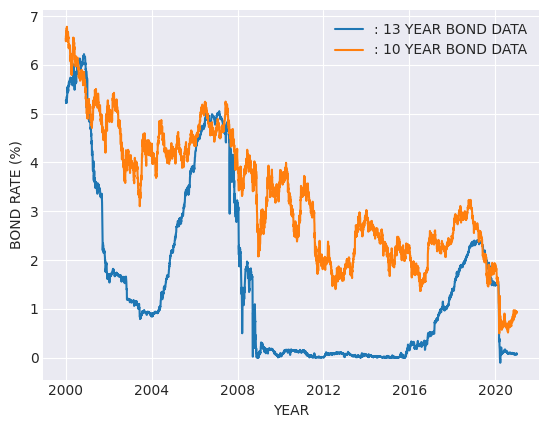

In [87]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(bond_data['13_week'])
plt.plot(bond_data['10_year'])
plt.xlabel('YEAR')
plt.ylabel('BOND RATE (%)')
plt.legend([': 13 YEAR BOND DATA' , ': 10 YEAR BOND DATA']);

In [49]:
# CREATING AN EMPTY LIST THAT WILL HAVE THE INDEX OF DAYS WHEN YIELD CURVE WAS INVERTED 
inverted_yc = []

for i in range(len(bond_data)):
    if bond_data['Difference'][i] < 0:
        inverted_yc.append(i)


# CREATING A LIST THAT CONTAINS ALL THE INDEX OF THE BOND (TIMESTAMPS)
date_list = list(bond_data.index)

#LIST THAT HAS THE LAST INDEX OF INVERTED YEILD CURVE 

last_day = [inverted_yc[0]]

for i in range(len(inverted_yc)-1):
    if ((inverted_yc[i] + 30) < inverted_yc[i+1]):
        
        last_day.append(inverted_yc[i])
        last_day.append(inverted_yc[i+1])
    
last_day.append(inverted_yc[-1])

i =0 
count = 1
inverted_yc_data = {}

while i < len(last_day)-1:
    
    total_days = last_day[i+1] - last_day[i]
    if total_days >= 30:
        inverted_yc_data[count] = [date_list[last_day[i]] , date_list[last_day[i+1]] , last_day[i+1] - last_day[i]]
        count += 1
    i += 2
    
print(inverted_yc_data)



{1: [Timestamp('2000-07-27 00:00:00'), Timestamp('2001-01-18 00:00:00'), 120], 2: [Timestamp('2006-08-01 00:00:00'), Timestamp('2007-05-14 00:00:00'), 195], 3: [Timestamp('2019-05-23 00:00:00'), Timestamp('2019-10-09 00:00:00'), 96]}


## Q1) WHAT HAPPENS TO THE S&P500 INDEX WHEN YEILD CURVE INVERTS ? 

In [50]:
# CONSISTENCTY OF RESULTS WILL BE CHECKED, HENCE TWO DIFFERENT TABLES, FIRST WHEN ANALYSIS IS DONE FROM THE DAY YEILD
# CURVE INVESION STARTS AND SECOND WHEN IT ENDS.

table_creation(snp , 'df_snp' , 'start','S&P500_START' , 'per_change')
table_creation(snp , 'df_snp' , 'end' , 'S&P500_END',  'per_change')


S&P500_START

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2000-07-27  -0.74%   -8.04%   -6.56%  -27.18%  -12.46%  -19.72%
2006-08-01   4.86%    9.19%   10.64%   10.66%   16.15%   12.89%
2019-05-23   5.45%    5.68%    9.55%   15.24%  -17.69%    1.45%
-----------------------------------------------------------------------------------

S&P500_END

             60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2001-01-18  -15.13%   -4.34%  -11.00%  -23.38%  -18.12%  -17.66%
2007-05-14    3.18%   -2.15%   -3.40%   -6.67%  -16.22%   -7.55%
2019-10-09    7.20%   12.74%   -9.60%    8.60%   11.71%   12.81%
-----------------------------------------------------------------------------------


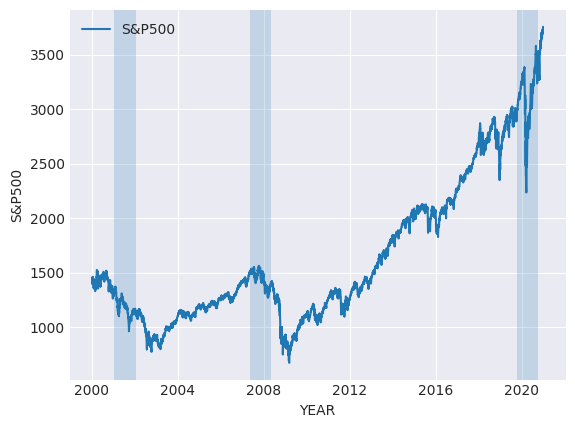

In [51]:
charting(snp , 'S&P500' , False)

## INFERENCES 

FROM THE ANALYSIS WE CAN MAKE THE FOLLOWING INFERENCES - 

1) USING THE END DATE FOR INVERSION GIVES MORE CONSISTENT RESULT THAN USING THE START DATE OF INVERISON. HENCE WE WILL BE USING THE END DATRE FOR THE ANY FURTHER ANALYSIS

2) THIS ANALYSIS WAS ABLE TO PREDICT THE 2001 TECHNOLOGY BOOM CRASH AND 2008 REAL ESTATE CRASH. 2019-2020 FALL OF MARKET WAS DUE TO COVID-19 AND NOT EXCESSIVE SPECULATION IN MARKETS. IN THAT PERIOD EVEN THOUGH S&P500 DID GAVE POSTIVE RETURNS WE CAN CLEARLY SEE FROM THE GRAPH THAT CORRECTED SIGNIFICANTLY DURING THAT PERIOD, HENCE MAKING IT A VERY RISKY ASSET. 


## Q2) NOW THAT WE KNOW THIS ANALYSIS HELPS US TO PREDICT A MARKET CRASH OR ATLEAST WE CAN ASSUME WITH SOME CETAINITY THAT THE EQUITIES MARKET WILL UNDERPERFORM IN THE COMING YEAR, WHAT ASSET CLASS CAN WE INVEST IN DURING THIS PERIOD ?

In [52]:

crude_oil = nasdaqdatalink.get("EIA/PET_RWTC_D")
gold = nasdaqdatalink.get("WGC/GOLD_DAILY_USD")
silver = nasdaqdatalink.get("LBMA/SILVER")
copper = nasdaqdatalink.get('ODA/PCOPP_USD')
crude_oil = removing_extra_data_for_df(crude_oil , date_list[0] , date_list[-1])
gold = removing_extra_data_for_df(gold , date_list[0] , date_list[-1])
silver = removing_extra_data_for_df(silver , date_list[0] , date_list[-1])
copper = removing_extra_data_for_df(gold , date_list[0] , date_list[-1])

LimitExceededError: (Status 429) (Nasdaq Data Link Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [53]:
silver = silver['USD']

KeyError: 'USD'

In [55]:
table_creation(silver , 'df_silver','start', 'SILVER' , 'per_change')
table_creation(gold , 'df_gold' , 'start','GOLD' , 'per_change')
table_creation(copper , 'df_copper' , 'start', 'COPPER' , 'per_change')
table_creation(crude_oil , 'df_crude__oil' , 'start','CRUDE OIL' , 'per_change')


SILVER

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2000-07-27  -0.87%   -6.93%   -2.71%  -13.58%   -9.18%  -16.94%
2006-08-01   1.69%   16.81%   14.11%   14.88%   12.15%   10.94%
2019-05-23  11.63%   19.02%   15.45%   19.82%  -16.59%   10.89%
-----------------------------------------------------------------------------------

GOLD

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2000-07-27  -2.57%   -5.39%   -5.17%   -6.47%    1.17%   -3.76%
2006-08-01  -6.34%    0.04%    1.28%    3.59%    2.75%    3.52%
2019-05-23  10.09%   14.53%   12.58%   17.59%   18.28%   18.28%
-----------------------------------------------------------------------------------

COPPER

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2000-07-27  -2.57%   -5.39%   -5.17%   -6.47%    1.17%   -3.76%
2006-08-01  -6.34%    0.04%    1.28%    3.59%    2.75%    3.52%
2019-05-23  10.09%   14.53%   12.58%   17.59%   22.38%   22.38%
------------------------------------

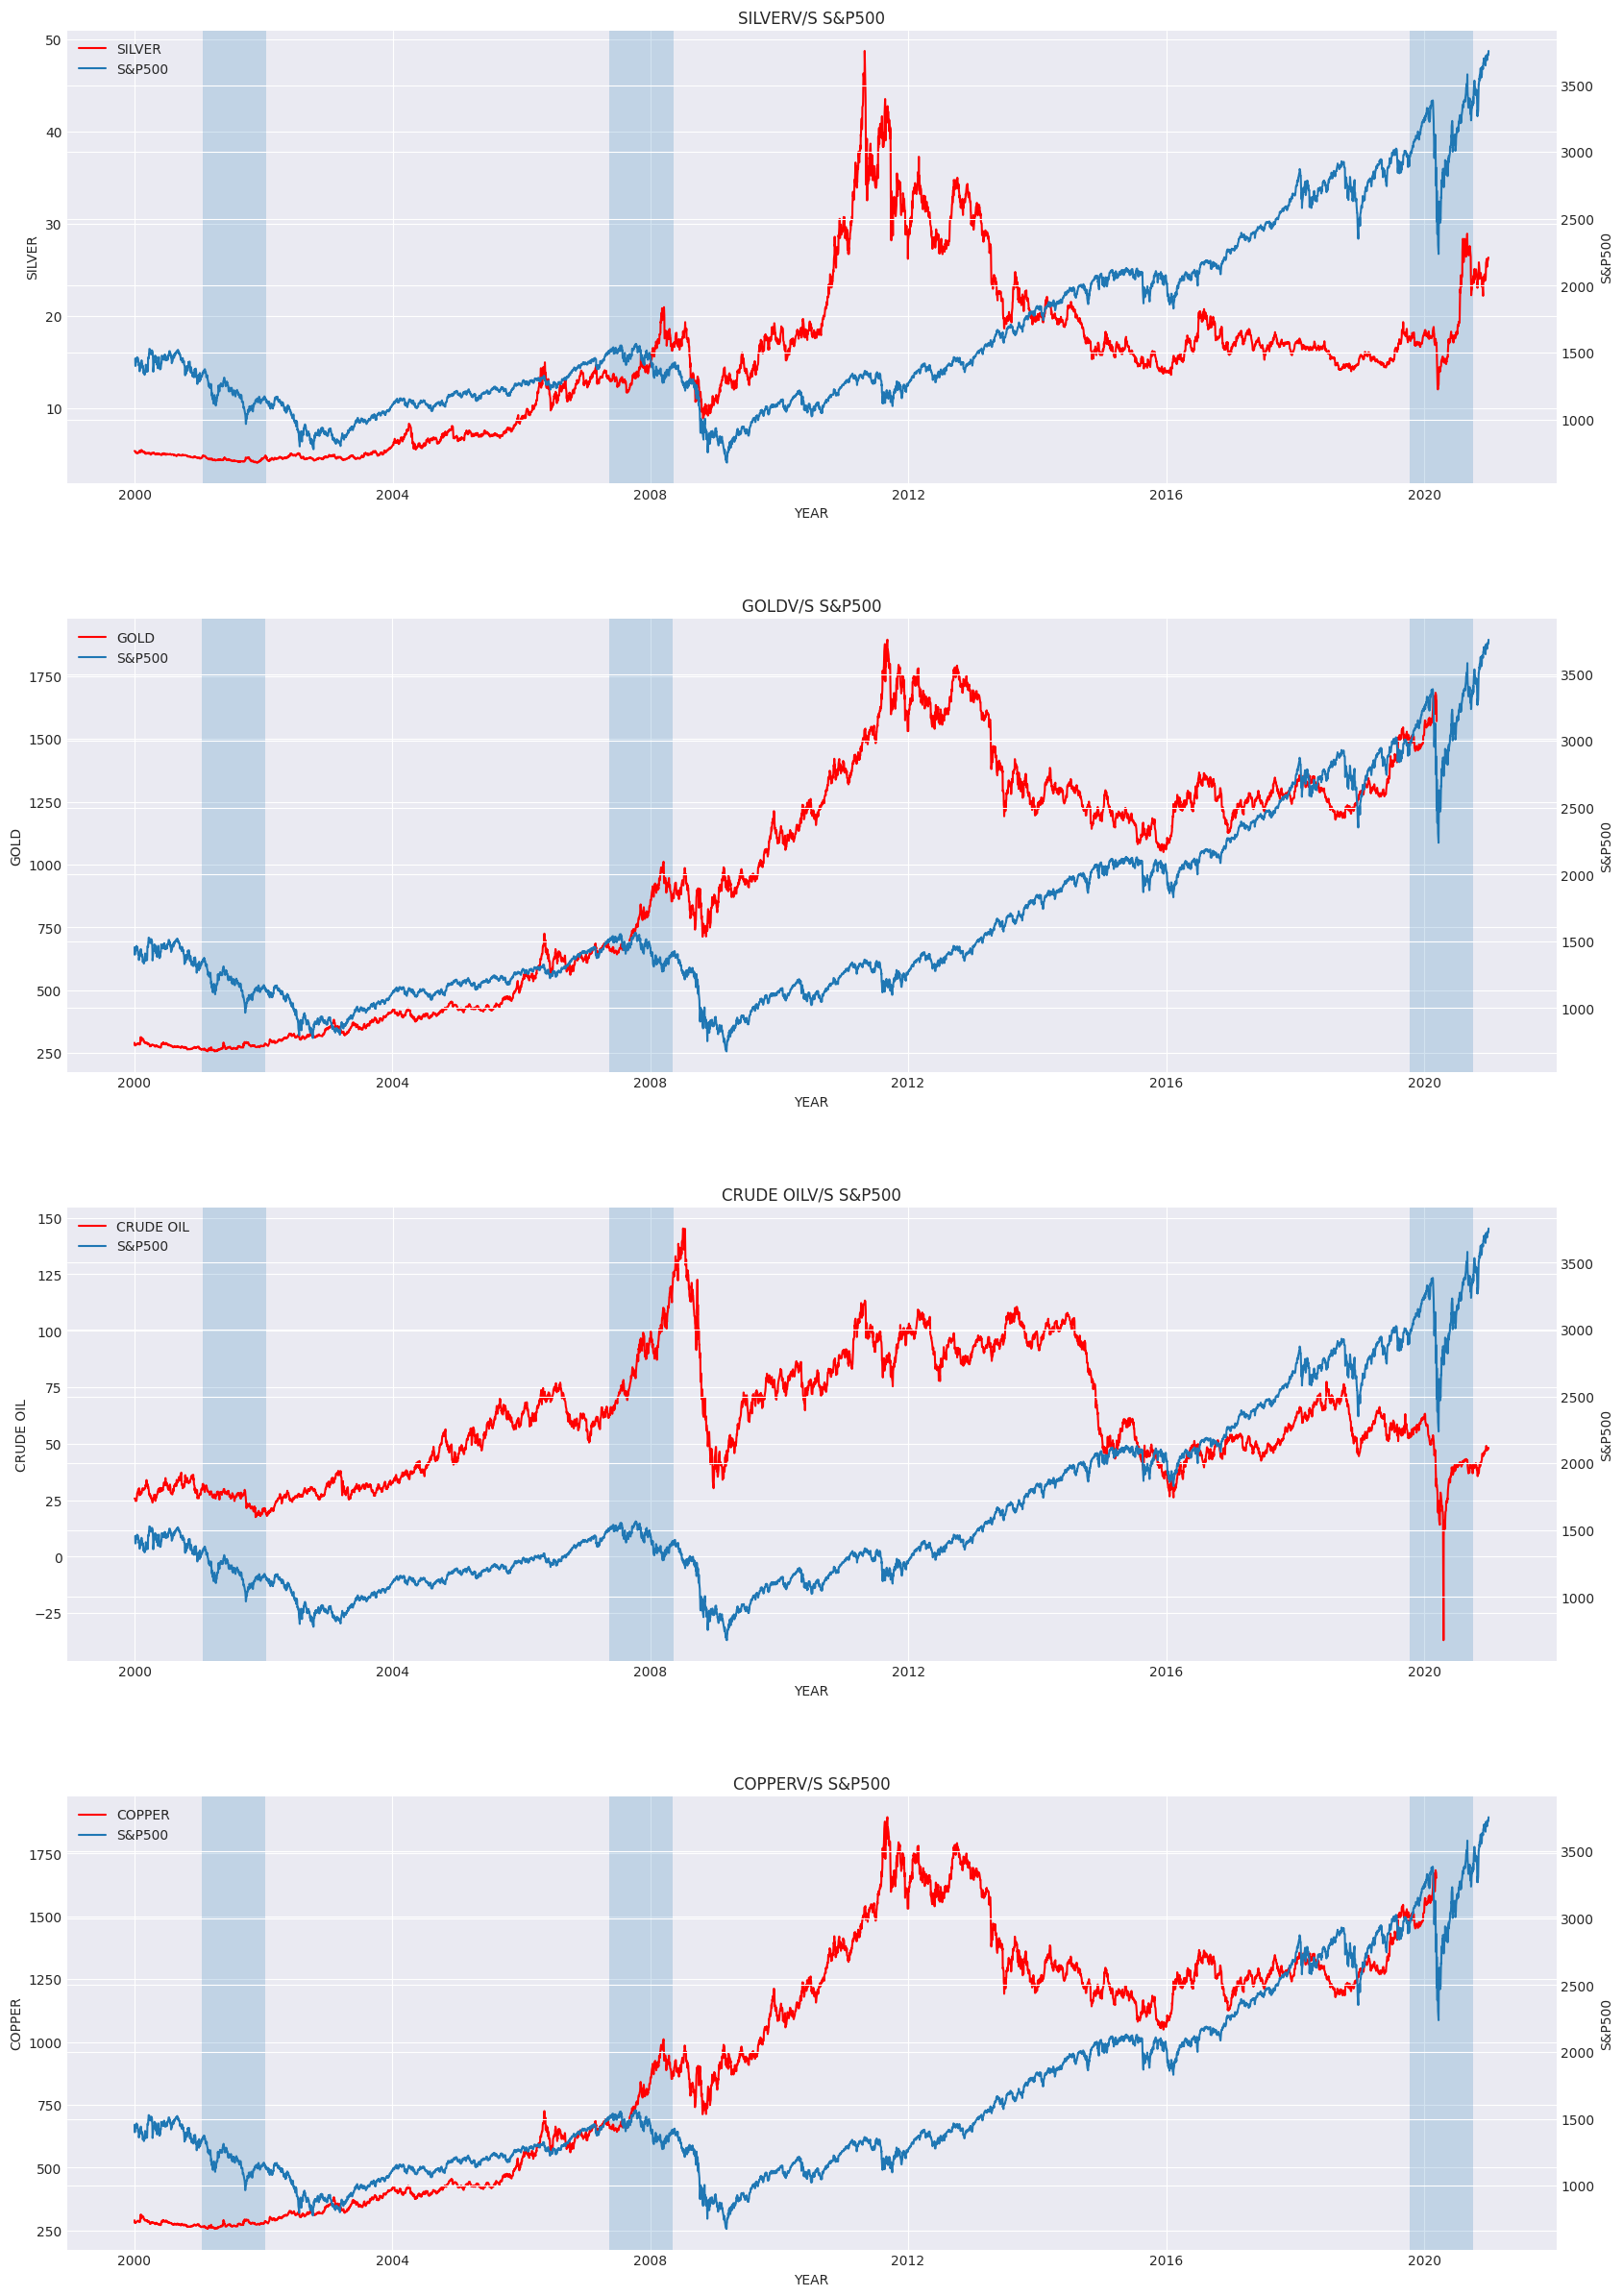

In [56]:

charting([silver,gold,crude_oil,copper],  ['SILVER','GOLD','CRUDE OIL' , 'COPPER'], True)


## INFERENCES 

FROM THE ABOVE ANALYSIS WE CAN MAKE THE FOLLOWING INFERENCES - 

1) INCLUDING GOLD AND SILVER IN THE PORTFOLIO IS A GOOD OPTIONS, SINCE BOTH METALS GAVE POSTIVE RETURNS. FURTHERMORE, WE CAN FURTHER OBSERVE THAT SILVER PERFORMS BETTER THAN GOLD. 

2) INCLUDING COPPER IS ALSO A GOOD OPTIONS, SINCE IT GAVE RETURNS ALMOST EQUAL TO IT'S AVERAGE OR MORE THAN AVERAGE. 

3) CRUDE OIL BECOMES HIGHLY VOLATILE DURING SUCH PERIODS AND SHOULD BE AVOIDED TO BE INCLUDED IN PORTFOLIO.

FINALLY, ONE CAN MAKE A PORTFOLIO OF PRECIOUS METALS(GOLD AND SILVER) AND COPPER AND HOLD IT FOR A YEAR TO GET POSTIVE RETURNS IN TIMES WHEN EQUITES MARKET WILL BE UNDERPERFORMING. 

## Q3) HOW DOES FED REACT AND CHANGES THE INTEREST RATE DURING THIS PERIOD ? 

In [86]:
# FED RATE DOWNLOADED FROM (##https://www.macrotrends.net/2015/fed-funds-rate-historical-chart) AS CSV FILE.
# NOTE :  DOWNLOAD THE FILE Fed_rates.csv in the SAME FOLDER AS THIS JUPTYER NOTEBOOK

fed_rates = pd.read_csv('Fed_rates.csv')
fed_rates

,date,value
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
24511,2023-01-15,NaN
24512,2023-01-16,NaN
24513,2023-01-17,NaN
24514,2023-01-18,NaN


In [85]:
# The data we got from csv file had index as (0,1,2,3) and date as a seperate column, hence we need to
# change the index of the DataFrame to date column.
# Also the date has the type string so we need to change that to pandas timestamp, for that we 
# will be running a loop do so 

index = []
for i in fed_rates['date'] : 
    index.append(pd.to_datetime(i , format='%Y-%m-%d'))
fed_rates.index = index
fed_rates = fed_rates['value']
fed_rates = removing_extra_data_for_df(fed_rates , date_list[0] , date_list[-1])


2000-01-03    5.43
2000-01-04    5.38
2000-01-05    5.41
2000-01-06    5.54
2000-01-07    5.61
              ... 
2020-12-23    0.09
2020-12-24    0.09
2020-12-28    0.09
2020-12-29    0.09
2020-12-30    0.09
Name: value, Length: 7371, dtype: float64

In [59]:
table_creation(fed_rates , 'df_fed_rates' ,'start','S&P500_START' , 'diff')



S&P500_START

             60 Days  120 Days  180 Days  240 Days  300 Days  360 Days
2000-07-27     0.02     -0.03     -0.55     -1.58     -2.55     -2.72
2006-08-01     0.07     -0.01     -0.01      0.02      0.02     -0.02
2019-05-23     0.02     -0.48     -0.83     -0.83     -2.13     -2.33
-----------------------------------------------------------------------------------


THE ABOVE TABLE SHOWS THE CHANGE IN FED INTEREST RATES AS COMPARED TO THE INTEREST RATE WHEN THE INVERSION ENDED. 


## INFERENCE 

FROM THE ABOVE ANALYSIS WE CAN DRAW THE INFERENCE THAT FED DECREASES THE INTEREST RATE GRADUALLY, TO SIMULATE THE ECONOMY AND INCREASE THE SPENDING. THIS WAS LATEST SEEN DURING THE COVID-19 CRISIS WHEN CENTRAL BANKS ALL AROUND THE WORLD STARTED DECREASING THE INTEREST RATE. 

## Q4) WHAT HAPPENS TO THE US DOLLAR WHEN COMPARED TO MAJOR CURRENCIES ?

In [60]:
usd_gpb = df_creation('GBP=X')
usd_jpy = df_creation('JPY=X')
usd_aud = df_creation('AUD=X')
usd_cad = df_creation('CAD=X')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [65]:

table_creation(usd_gpb , 'df_usd_gbp' ,'end', ' USD/GBP' , 'per_change' )
table_creation(usd_jpy , 'df_usd_jpy' , 'end',' USD/JPY' , 'per_change' )
table_creation(usd_aud , 'df_usd_aud'  , 'end','USD/AUD' , 'per_change')
table_creation(usd_cad , 'df_usd_cad'  , 'end','USD/CAD' , 'per_change')



 USD/GBP

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2007-05-14  -2.81%   -2.73%   -5.84%    1.09%   -1.76%    1.18%
2019-10-09  -7.68%   -6.36%   -0.00%   -3.19%   -7.03%   -5.46%
-----------------------------------------------------------------------------------

 USD/JPY

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2001-01-18   3.99%    4.54%    5.53%   -0.49%    2.99%   10.78%
2007-05-14   1.30%   -5.30%   -8.73%   -9.50%  -17.16%  -11.13%
2019-10-09   1.63%    2.60%    1.59%    2.01%   -0.88%   -1.34%
-----------------------------------------------------------------------------------

USD/AUD

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Days
2007-05-14  -4.41%   -0.18%   -9.88%   -6.07%  -11.44%  -13.36%
2019-10-09  -1.56%   -0.35%   10.90%   -3.15%   -5.79%   -6.76%
-----------------------------------------------------------------------------------

USD/CAD

            60 Days 120 Days 180 Days 240 Days 300 Days 360 Day

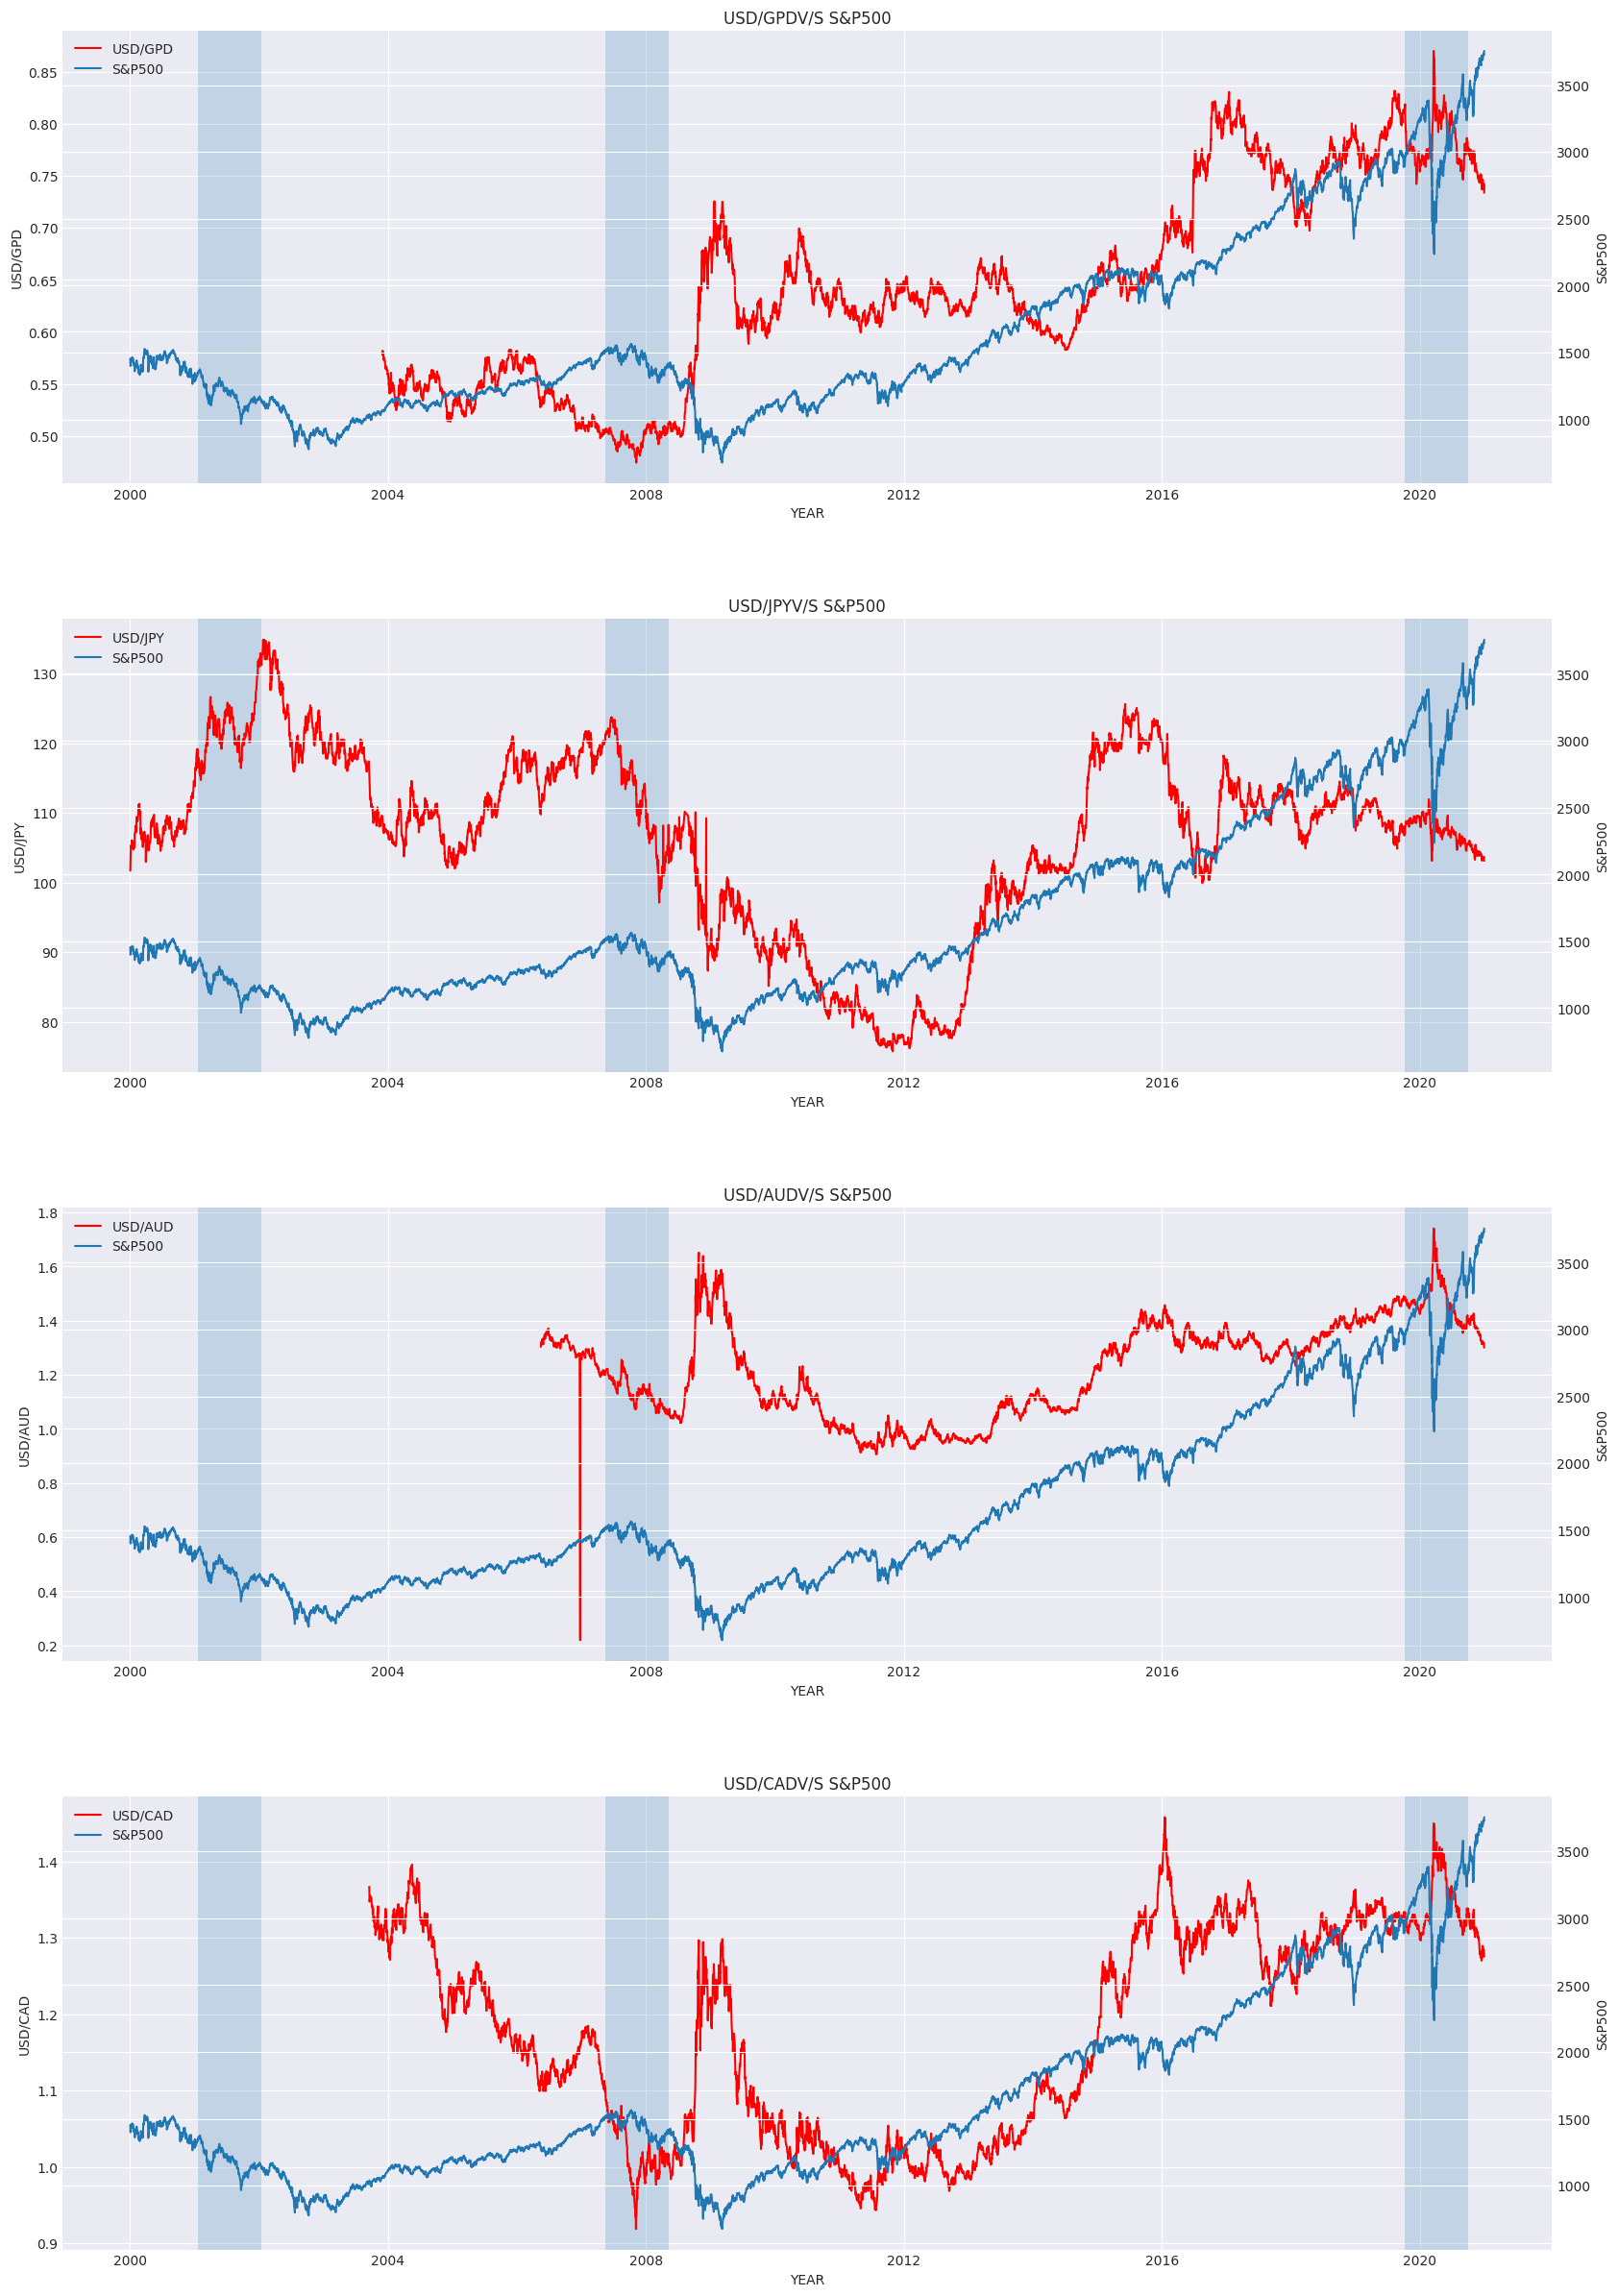

In [64]:
charting([usd_gpb , usd_jpy , usd_aud , usd_cad] , ['USD/GPD' , 'USD/JPY' , 'USD/AUD' ,'USD/CAD' ] , True)

## INFERENCES 

FORM THE CHARTS PLOTTED WE CAN DRAW THE INFERENCE THAT THE USD FALLS DOWN WHENEVER THE YIELD CURVE INVERSION ENDS AND BUYING CURRENCIES LIKE AUD AND JPY IS A GOOD IDEA.  

## CONCLUSION 

THE ANALYSIS WAS DONE AND THE FOLLOWING CONCLUSIONS CAN BE DRAWN - 

1) AFTER A YEILD CRUVE INVERSION ENDS WE CAN EXPECT THE S&P500 TO FALL DOWN OR AT LEAST BECOMES WEAK FOR THE NEXT YEAR.
2) GOLD AND SILVER ARE GOOD INVESTMENT. COPPER CAN ALSO BE INCLUDED IN THE PORTFOLIO. 
3) FED TRIES TO SIMULATE THE ECONOMY BY DECREASING THE INTEREST RATES.
4) USD FALLS AGAINST OTHER CURRENCIES.